Populating the interactive namespace from numpy and matplotlib
E_1S =  12.66
E_1G =  8.26
E_1D =  7.21
E_3P =  7.55
E_3F =  5.3
E_1S =  12.66
E_1G =  8.26
E_1D =  7.21
E_3P =  7.55
E_3F =  5.3


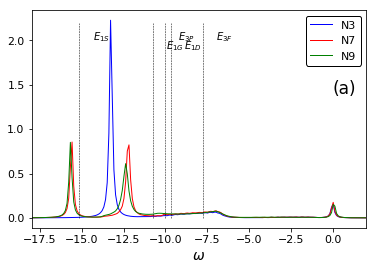

In [6]:
# compare the Aw (1A1 sym) for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
ep = 3.0

tpd = 1.3
tpp = 0.65

pds = 1.5
pdp = 0.65
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0

Mc = 20

fNorb3 = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc)+'_Norb3_eta0.1'
fNorb7 = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc)+'_Norb7_eta0.1_1A1'
fNorb9 = 'ep'+str(ep)+'_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc)+'_Norb9_eta0.1_1A1'
titlename = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc)      

##########################################################################
# compare w of lowest peak
##########################################################################
Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y']

def get_atomic_d8_energy(A,B,C):
    E_1S = A+14*B+7*C
    E_1G = A+4*B+2*C
    E_1D = A-3*B+2*C
    E_3P = A+7*B
    E_3F = A-8*B
    print "E_1S = ", E_1S      
    print "E_1G = ", E_1G     
    print "E_1D = ", E_1D 
    print "E_3P = ", E_3P
    print "E_3F = ", E_3F
    return E_1S, E_1G, E_1D, E_3P, E_3F
    
def plot_atomic_multiplet_peaks(E_1S, E_1G, E_1D, E_3P, E_3F, E0):
    get_atomic_d8_energy(A,B,C)
    offset = 0.8
    y1 = 1.9
    y2 = 2.0
    yy = [0,2.2]
    xx = [E0-E_1S,E0-E_1S]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_1S-0.2, 10.2, 'E_1S', fontsize=5)
    xx = [E0-E_1G,E0-E_1G]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_1G-0.2, 10.5, 'E_1G', fontsize=5)
    xx = [E0-E_1D,E0-E_1D]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_1D-0.2, 10.8, 'E_1D', fontsize=5)
    xx = [E0-E_3P,E0-E_3P]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_3P-0.2, 11.1, 'E_3P', fontsize=5)
    xx = [E0-E_3F,E0-E_3F]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_3F-0.2, 11.4, 'E_3F', fontsize=5)
    
    if Nsym==1:
        text(E0-E_1S+offset, y2, '$E_{1S}$', fontsize=10)
        text(E0-E_1G+offset, y1, '$E_{1G}$', fontsize=10)
        text(E0-E_1D+offset, y1, '$E_{1D}$', fontsize=10)
        text(E0-E_3P+offset, y2, '$E_{3P}$', fontsize=10)
        text(E0-E_3F+offset, y2, '$E_{3F}$', fontsize=10)
    
##########################################################################
if __name__ == '__main__': 
    symmetries = ['1A1']#,'1A2','3A2','1B1','3B1','1E','3E']#,'1B2','3B2']
    Nsym = len(symmetries)
    for i in range(0,Nsym):
        sym = symmetries[i]
        
        E0 = -2.4817209500147674

        if Nsym>1:
            subplot(Nsym,1,i+1)
        #a = loadtxt('./data_Aw/'+fNorb7+'_'+sym+'.txt',skiprows=1)
        #plot(a[:,0], a[:,1], '-k', linewidth=1, label=sym)

        if sym=='1A1':
            # comparison between different orbitals
            a = loadtxt('./data_Aw/'+fNorb3+'.txt',skiprows=1)
            plot(E0-a[:,0], a[:,1], '-b', linewidth=1, label='N3')
            a = loadtxt('./data_Aw/'+fNorb7+'.txt',skiprows=1)
            plot(E0-a[:,0], a[:,1], '-r', linewidth=1, label='N7')
            a = loadtxt('./data_Aw/'+fNorb9+'.txt',skiprows=1)
            plot(E0-a[:,0], a[:,1], '-g', linewidth=1, label='N9')

        maxval = max(a[:,1])
        E_1S, E_1G, E_1D, E_3P, E_3F = get_atomic_d8_energy(A,B,C)
        plot_atomic_multiplet_peaks(E_1S, E_1G, E_1D, E_3P, E_3F, E0)

        #if i==0:
        #    title(titlename, fontsize=8)
        if i==Nsym-1:
            xlabel('$\omega$',fontsize=14)

        xlim([-18,2])
        #xlim([-7.5,13])
        #ylim([0,0.5])
        #ylim([0,maxval])
        xticks(fontsize=11) 
        plt.yticks(fontsize=11)
        #ylabel('$A(\omega)$',fontsize=17)
        text(0, 1.4, '(a)', fontsize=17)
        #grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
        if symmetries==['1A1']:
            legend(loc='best', fontsize=11, framealpha=1.0, edgecolor='black') 
        else:
            legend(loc='best', fontsize=11, framealpha=1.0, edgecolor='black')
    
    if symmetries==['1A1']:
        savefig("imp_compare_Aw_Norb_"+titlename+"_enlarged.pdf")
    else:
        savefig("imp_compare_Aw_Norb_"+titlename+".pdf")